In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 250
generations = int(3000/necoc)
generations

12

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

115


In [7]:
len(number_codes[0])

250

In [8]:
winner_list = []

for i,class1 in enumerate(classes):
    print("running:{}/250".format(i))
    winner = get_winner(class1)
    winner_list.append(winner)

running:0/250
number of class1:971
number of class2:646

 ****** Running generation 0 ****** 

Population's average fitness: 0.46972 stdev: 0.09552
Best fitness: 0.69573 - size: (2, 13) - species 2 - id 132
Average adjusted fitness: 0.237
Mean genetic distance 2.906, standard deviation 0.480
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 8.162 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54184 stdev: 0.09049
Best fitness: 0.75572 - size: (3, 15) - species 1 - id 337
Average adjusted fitness: 0.252
Mean genetic distance 3.029, standard deviation 0.476
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.726 sec (7.944 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55334 stdev: 0.10189
Best fitness: 0.75572 - size: (3, 15) - species 1 - id 337
Average adjusted fitness: 0.243
Mean genetic distance 3.088, standard deviation 0.481
Population of 204 members in 35 species
T

Population's average fitness: 0.51739 stdev: 0.09967
Best fitness: 0.75572 - size: (2, 13) - species 6 - id 85
Average adjusted fitness: 0.328
Mean genetic distance 2.932, standard deviation 0.469
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.975 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55391 stdev: 0.09643
Best fitness: 0.75572 - size: (2, 13) - species 6 - id 85
Average adjusted fitness: 0.231
Mean genetic distance 2.969, standard deviation 0.484
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 12.867 sec (12.921 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56293 stdev: 0.09825
Best fitness: 0.76809 - size: (2, 14) - species 7 - id 477
Average adjusted fitness: 0.261
Mean genetic distance 3.050, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 22.037 sec (15.960 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.47143 stdev: 0.14845
Best fitness: 0.73655 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.216
Mean genetic distance 2.970, standard deviation 0.500
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55791 stdev: 0.14694
Best fitness: 0.73655 - size: (2, 13) - species 4 - id 69
Average adjusted fitness: 0.283
Mean genetic distance 3.053, standard deviation 0.510
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 16.214 sec (15.584 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59542 stdev: 0.14033
Best fitness: 0.74088 - size: (3, 16) - species 4 - id 529
Average adjusted fitness: 0.296
Mean genetic distance 3.137, standard deviation 0.508
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 13.882 sec (15.016

Population's average fitness: 0.45888 stdev: 0.14430
Best fitness: 0.78479 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.271
Mean genetic distance 2.989, standard deviation 0.487
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 14.178 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55782 stdev: 0.15450
Best fitness: 0.78479 - size: (2, 13) - species 5 - id 9
Average adjusted fitness: 0.298
Mean genetic distance 3.053, standard deviation 0.470
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 12.995 sec (13.587 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61018 stdev: 0.13894
Best fitness: 0.79592 - size: (3, 16) - species 9 - id 512
Average adjusted fitness: 0.316
Mean genetic distance 3.117, standard deviation 0.481
Population of 207 members in 41 species
Total extinctions: 0
Generation time: 14.528 sec (13.900 average)

 ****** Running generation 3 *

Population's average fitness: 0.49592 stdev: 0.05561
Best fitness: 0.62832 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.196
Mean genetic distance 2.953, standard deviation 0.458
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 12.137 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51683 stdev: 0.05930
Best fitness: 0.67100 - size: (3, 14) - species 7 - id 322
Average adjusted fitness: 0.177
Mean genetic distance 3.033, standard deviation 0.452
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 16.519 sec (14.328 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53687 stdev: 0.05582
Best fitness: 0.68275 - size: (4, 15) - species 28 - id 535
Average adjusted fitness: 0.131
Mean genetic distance 3.095, standard deviation 0.469
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 16.336 sec (14.997 average)

 ****** Running generation 

Population's average fitness: 0.49436 stdev: 0.05156
Best fitness: 0.64564 - size: (2, 13) - species 1 - id 82
Average adjusted fitness: 0.148
Mean genetic distance 2.946, standard deviation 0.434
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 11.882 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51604 stdev: 0.05788
Best fitness: 0.69388 - size: (3, 15) - species 28 - id 368
Average adjusted fitness: 0.169
Mean genetic distance 3.003, standard deviation 0.451
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 12.880 sec (12.381 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53408 stdev: 0.05760
Best fitness: 0.69388 - size: (3, 15) - species 28 - id 368
Average adjusted fitness: 0.147
Mean genetic distance 3.048, standard deviation 0.468
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 18.366 sec (14.376 average)

 ****** Running generatio

Population's average fitness: 0.52035 stdev: 0.10142
Best fitness: 0.71490 - size: (2, 13) - species 3 - id 175
Average adjusted fitness: 0.268
Mean genetic distance 2.934, standard deviation 0.478
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.157 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55078 stdev: 0.10369
Best fitness: 0.73346 - size: (3, 15) - species 8 - id 352
Average adjusted fitness: 0.247
Mean genetic distance 3.073, standard deviation 0.478
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.911 sec (7.534 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56451 stdev: 0.10028
Best fitness: 0.73346 - size: (3, 15) - species 2 - id 352
Average adjusted fitness: 0.254
Mean genetic distance 3.051, standard deviation 0.488
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 8.184 sec (7.751 average)

 ****** Running generation 3 **

Population's average fitness: 0.54676 stdev: 0.20128
Best fitness: 0.82437 - size: (2, 13) - species 7 - id 62
Average adjusted fitness: 0.384
Mean genetic distance 2.910, standard deviation 0.486
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.348 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65354 stdev: 0.18932
Best fitness: 0.85405 - size: (2, 14) - species 8 - id 218
Average adjusted fitness: 0.460
Mean genetic distance 2.982, standard deviation 0.500
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.597 sec (7.473 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.69864 stdev: 0.16730
Best fitness: 0.85838 - size: (4, 16) - species 23 - id 472
Average adjusted fitness: 0.484
Mean genetic distance 3.041, standard deviation 0.517
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 8.050 sec (7.665 average)

 ****** Running generation 3 **

Population's average fitness: 0.46049 stdev: 0.14627
Best fitness: 0.74583 - size: (2, 13) - species 2 - id 22
Average adjusted fitness: 0.231
Mean genetic distance 2.912, standard deviation 0.444
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.804 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53970 stdev: 0.15409
Best fitness: 0.76252 - size: (2, 14) - species 2 - id 273
Average adjusted fitness: 0.259
Mean genetic distance 3.067, standard deviation 0.475
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 8.787 sec (9.795 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59689 stdev: 0.14328
Best fitness: 0.77304 - size: (3, 15) - species 6 - id 431
Average adjusted fitness: 0.285
Mean genetic distance 3.077, standard deviation 0.492
Population of 208 members in 37 species
Total extinctions: 0
Generation time: 10.922 sec (10.171 average)

 ****** Running generation 3 

Population's average fitness: 0.46245 stdev: 0.15921
Best fitness: 0.75015 - size: (2, 13) - species 4 - id 45
Average adjusted fitness: 0.255
Mean genetic distance 2.885, standard deviation 0.481
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 8.782 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55605 stdev: 0.15513
Best fitness: 0.80519 - size: (3, 15) - species 3 - id 347
Average adjusted fitness: 0.383
Mean genetic distance 3.031, standard deviation 0.480
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.932 sec (8.857 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57721 stdev: 0.15532
Best fitness: 0.80519 - size: (3, 15) - species 26 - id 347
Average adjusted fitness: 0.418
Mean genetic distance 3.119, standard deviation 0.494
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 11.733 sec (9.816 average)

 ****** Running generation 3 *

Population's average fitness: 0.52072 stdev: 0.08549
Best fitness: 0.72604 - size: (2, 13) - species 1 - id 28
Average adjusted fitness: 0.242
Mean genetic distance 2.892, standard deviation 0.454
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 7.791 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55477 stdev: 0.08639
Best fitness: 0.73098 - size: (3, 15) - species 3 - id 361
Average adjusted fitness: 0.192
Mean genetic distance 3.008, standard deviation 0.463
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 10.216 sec (9.004 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57670 stdev: 0.09333
Best fitness: 0.73098 - size: (3, 15) - species 22 - id 361
Average adjusted fitness: 0.288
Mean genetic distance 3.076, standard deviation 0.483
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 11.561 sec (9.856 average)

 ****** Running generation 3 

Population's average fitness: 0.53176 stdev: 0.09097
Best fitness: 0.72542 - size: (2, 13) - species 1 - id 40
Average adjusted fitness: 0.229
Mean genetic distance 2.986, standard deviation 0.488
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 10.190 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53860 stdev: 0.09668
Best fitness: 0.74644 - size: (3, 15) - species 26 - id 351
Average adjusted fitness: 0.239
Mean genetic distance 3.084, standard deviation 0.478
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.930 sec (9.060 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56194 stdev: 0.09414
Best fitness: 0.74644 - size: (3, 15) - species 26 - id 351
Average adjusted fitness: 0.240
Mean genetic distance 3.113, standard deviation 0.484
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 9.606 sec (9.242 average)

 ****** Running generation 3 

Population's average fitness: 0.56437 stdev: 0.21328
Best fitness: 0.83797 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.423
Mean genetic distance 2.896, standard deviation 0.454
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 8.078 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65310 stdev: 0.20159
Best fitness: 0.83797 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.439
Mean genetic distance 2.976, standard deviation 0.455
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 8.469 sec (8.273 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66157 stdev: 0.20004
Best fitness: 0.87260 - size: (2, 15) - species 22 - id 534
Average adjusted fitness: 0.505
Mean genetic distance 3.016, standard deviation 0.468
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 9.605 sec (8.717 average)

 ****** Running generation 3 ***

Population's average fitness: 0.49963 stdev: 0.05489
Best fitness: 0.65986 - size: (2, 13) - species 1 - id 178
Average adjusted fitness: 0.199
Mean genetic distance 2.967, standard deviation 0.471
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 10.491 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52181 stdev: 0.05115
Best fitness: 0.70501 - size: (2, 13) - species 26 - id 376
Average adjusted fitness: 0.108
Mean genetic distance 3.064, standard deviation 0.482
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 10.745 sec (10.618 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53816 stdev: 0.05823
Best fitness: 0.70501 - size: (2, 13) - species 26 - id 376
Average adjusted fitness: 0.213
Mean genetic distance 3.132, standard deviation 0.491
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 12.809 sec (11.348 average)

 ****** Running generati

Population's average fitness: 0.52464 stdev: 0.09493
Best fitness: 0.68707 - size: (2, 13) - species 3 - id 87
Average adjusted fitness: 0.228
Mean genetic distance 2.867, standard deviation 0.455
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 11.429 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55543 stdev: 0.08850
Best fitness: 0.73531 - size: (3, 14) - species 3 - id 355
Average adjusted fitness: 0.222
Mean genetic distance 2.970, standard deviation 0.488
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 17.494 sec (14.461 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56385 stdev: 0.09029
Best fitness: 0.74212 - size: (3, 15) - species 18 - id 514
Average adjusted fitness: 0.209
Mean genetic distance 3.051, standard deviation 0.467
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 16.065 sec (14.996 average)

 ****** Running generation

Population's average fitness: 0.45473 stdev: 0.14740
Best fitness: 0.75943 - size: (2, 13) - species 8 - id 83
Average adjusted fitness: 0.215
Mean genetic distance 2.968, standard deviation 0.541
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 11.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56963 stdev: 0.14377
Best fitness: 0.75943 - size: (2, 13) - species 8 - id 83
Average adjusted fitness: 0.275
Mean genetic distance 3.102, standard deviation 0.508
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 13.147 sec (12.257 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61123 stdev: 0.13265
Best fitness: 0.77551 - size: (3, 15) - species 8 - id 535
Average adjusted fitness: 0.308
Mean genetic distance 3.135, standard deviation 0.461
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 13.019 sec (12.511 average)

 ****** Running generation 3


 ****** Running generation 0 ****** 

Population's average fitness: 0.50506 stdev: 0.05740
Best fitness: 0.68831 - size: (2, 13) - species 1 - id 4
Average adjusted fitness: 0.150
Mean genetic distance 2.990, standard deviation 0.531
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 15.698 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53370 stdev: 0.05912
Best fitness: 0.71861 - size: (2, 14) - species 9 - id 333
Average adjusted fitness: 0.125
Mean genetic distance 3.034, standard deviation 0.487
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 21.610 sec (18.654 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54473 stdev: 0.06825
Best fitness: 0.71861 - size: (2, 14) - species 9 - id 333
Average adjusted fitness: 0.187
Mean genetic distance 3.060, standard deviation 0.505
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 18.372 sec (18.560

Population's average fitness: 0.44191 stdev: 0.20711
Best fitness: 0.80210 - size: (2, 13) - species 3 - id 118
Average adjusted fitness: 0.226
Mean genetic distance 2.925, standard deviation 0.492
Population of 198 members in 23 species
Total extinctions: 0
Generation time: 12.953 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60266 stdev: 0.19529
Best fitness: 0.81942 - size: (2, 12) - species 1 - id 277
Average adjusted fitness: 0.411
Mean genetic distance 3.042, standard deviation 0.515
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 15.758 sec (14.356 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67074 stdev: 0.18380
Best fitness: 0.81942 - size: (2, 12) - species 2 - id 277
Average adjusted fitness: 0.463
Mean genetic distance 3.071, standard deviation 0.525
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.099 sec (15.937 average)

 ****** Running generation


 ****** Running generation 0 ****** 

Population's average fitness: 0.52030 stdev: 0.09097
Best fitness: 0.68893 - size: (2, 13) - species 1 - id 150
Average adjusted fitness: 0.229
Mean genetic distance 3.010, standard deviation 0.474
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.576 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55652 stdev: 0.08741
Best fitness: 0.74830 - size: (3, 15) - species 8 - id 370
Average adjusted fitness: 0.212
Mean genetic distance 3.050, standard deviation 0.475
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 11.555 sec (11.066 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56734 stdev: 0.08506
Best fitness: 0.74830 - size: (3, 15) - species 31 - id 370
Average adjusted fitness: 0.165
Mean genetic distance 3.048, standard deviation 0.476
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 12.587 sec (11.

Population's average fitness: 0.44968 stdev: 0.14538
Best fitness: 0.74892 - size: (2, 13) - species 2 - id 57
Average adjusted fitness: 0.244
Mean genetic distance 2.895, standard deviation 0.503
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 10.539 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55473 stdev: 0.15424
Best fitness: 0.74892 - size: (2, 13) - species 6 - id 57
Average adjusted fitness: 0.322
Mean genetic distance 3.008, standard deviation 0.499
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 11.610 sec (11.074 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59680 stdev: 0.14706
Best fitness: 0.76809 - size: (4, 17) - species 2 - id 504
Average adjusted fitness: 0.393
Mean genetic distance 3.079, standard deviation 0.508
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 12.134 sec (11.428 average)

 ****** Running generation 3

Population's average fitness: 0.50674 stdev: 0.08314
Best fitness: 0.77984 - size: (2, 13) - species 1 - id 62
Average adjusted fitness: 0.232
Mean genetic distance 2.902, standard deviation 0.489
Population of 201 members in 22 species
Total extinctions: 0
Generation time: 10.042 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54144 stdev: 0.09475
Best fitness: 0.82808 - size: (2, 14) - species 17 - id 320
Average adjusted fitness: 0.337
Mean genetic distance 3.018, standard deviation 0.473
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 10.865 sec (10.454 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56190 stdev: 0.08200
Best fitness: 0.82808 - size: (2, 14) - species 17 - id 320
Average adjusted fitness: 0.225
Mean genetic distance 3.035, standard deviation 0.466
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 11.005 sec (10.638 average)

 ****** Running generatio


 ****** Running generation 0 ****** 

Population's average fitness: 0.51571 stdev: 0.10047
Best fitness: 0.74397 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.266
Mean genetic distance 2.908, standard deviation 0.464
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 24.769 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54862 stdev: 0.10518
Best fitness: 0.74397 - size: (2, 13) - species 2 - id 164
Average adjusted fitness: 0.261
Mean genetic distance 2.994, standard deviation 0.474
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 21.608 sec (23.188 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55645 stdev: 0.10574
Best fitness: 0.79716 - size: (4, 16) - species 1 - id 493
Average adjusted fitness: 0.258
Mean genetic distance 3.044, standard deviation 0.478
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 22.450 sec (22.9


 ****** Running generation 0 ****** 

Population's average fitness: 0.53331 stdev: 0.13144
Best fitness: 0.73964 - size: (2, 13) - species 1 - id 50
Average adjusted fitness: 0.291
Mean genetic distance 2.974, standard deviation 0.438
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 20.387 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61695 stdev: 0.12523
Best fitness: 0.73964 - size: (2, 13) - species 6 - id 50
Average adjusted fitness: 0.315
Mean genetic distance 3.068, standard deviation 0.434
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 22.007 sec (21.197 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62989 stdev: 0.11625
Best fitness: 0.75881 - size: (3, 14) - species 36 - id 526
Average adjusted fitness: 0.330
Mean genetic distance 3.101, standard deviation 0.462
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 22.913 sec (21.76


 ****** Running generation 0 ****** 

Population's average fitness: 0.46374 stdev: 0.14108
Best fitness: 0.72727 - size: (2, 13) - species 5 - id 153
Average adjusted fitness: 0.222
Mean genetic distance 2.952, standard deviation 0.486
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 30.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57601 stdev: 0.14353
Best fitness: 0.74088 - size: (2, 14) - species 2 - id 375
Average adjusted fitness: 0.307
Mean genetic distance 3.073, standard deviation 0.476
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 23.807 sec (27.388 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61061 stdev: 0.13673
Best fitness: 0.75387 - size: (2, 14) - species 6 - id 534
Average adjusted fitness: 0.328
Mean genetic distance 3.104, standard deviation 0.467
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 23.764 sec (26.1


 ****** Running generation 0 ****** 

Population's average fitness: 0.48044 stdev: 0.08872
Best fitness: 0.71305 - size: (2, 13) - species 1 - id 105
Average adjusted fitness: 0.225
Mean genetic distance 2.995, standard deviation 0.491
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 21.365 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53077 stdev: 0.09465
Best fitness: 0.71676 - size: (3, 14) - species 3 - id 380
Average adjusted fitness: 0.194
Mean genetic distance 3.048, standard deviation 0.497
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.739 sec (21.552 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54757 stdev: 0.09703
Best fitness: 0.73531 - size: (4, 16) - species 3 - id 529
Average adjusted fitness: 0.271
Mean genetic distance 3.056, standard deviation 0.493
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 25.247 sec (22.7


 ****** Running generation 0 ****** 

Population's average fitness: 0.53468 stdev: 0.15375
Best fitness: 0.83550 - size: (2, 13) - species 1 - id 24
Average adjusted fitness: 0.282
Mean genetic distance 2.935, standard deviation 0.493
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 40.111 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59247 stdev: 0.14859
Best fitness: 0.83550 - size: (2, 13) - species 3 - id 24
Average adjusted fitness: 0.331
Mean genetic distance 3.007, standard deviation 0.510
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 49.067 sec (44.589 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.63013 stdev: 0.13966
Best fitness: 0.83550 - size: (2, 13) - species 12 - id 24
Average adjusted fitness: 0.378
Mean genetic distance 3.121, standard deviation 0.535
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 42.758 sec (43.978


 ****** Running generation 0 ****** 

Population's average fitness: 0.43309 stdev: 0.26318
Best fitness: 0.90291 - size: (2, 13) - species 5 - id 77
Average adjusted fitness: 0.328
Mean genetic distance 2.835, standard deviation 0.436
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 18.368 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59228 stdev: 0.27029
Best fitness: 0.90291 - size: (2, 13) - species 10 - id 265
Average adjusted fitness: 0.513
Mean genetic distance 2.979, standard deviation 0.460
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.984 sec (18.676 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.71434 stdev: 0.26194
Best fitness: 0.90291 - size: (3, 15) - species 10 - id 398
Average adjusted fitness: 0.576
Mean genetic distance 2.972, standard deviation 0.457
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 19.253 sec (18.


 ****** Running generation 0 ****** 

Population's average fitness: 0.44229 stdev: 0.13125
Best fitness: 0.71181 - size: (2, 13) - species 1 - id 69
Average adjusted fitness: 0.167
Mean genetic distance 2.931, standard deviation 0.474
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 22.143 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54068 stdev: 0.13898
Best fitness: 0.71429 - size: (2, 14) - species 11 - id 248
Average adjusted fitness: 0.252
Mean genetic distance 3.088, standard deviation 0.494
Population of 205 members in 29 species
Total extinctions: 0
Generation time: 22.378 sec (22.261 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59594 stdev: 0.13577
Best fitness: 0.74088 - size: (3, 16) - species 7 - id 416
Average adjusted fitness: 0.280
Mean genetic distance 3.184, standard deviation 0.499
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 20.010 sec (21.5


 ****** Running generation 0 ****** 

Population's average fitness: 0.53579 stdev: 0.09829
Best fitness: 0.82684 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.244
Mean genetic distance 2.867, standard deviation 0.492
Population of 198 members in 22 species
Total extinctions: 0
Generation time: 12.867 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55862 stdev: 0.11987
Best fitness: 0.83179 - size: (3, 14) - species 6 - id 287
Average adjusted fitness: 0.305
Mean genetic distance 3.020, standard deviation 0.482
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.706 sec (15.787 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58175 stdev: 0.12601
Best fitness: 0.86518 - size: (3, 15) - species 5 - id 538
Average adjusted fitness: 0.232
Mean genetic distance 3.134, standard deviation 0.478
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 25.097 sec (18.890


 ****** Running generation 0 ****** 

Population's average fitness: 0.52029 stdev: 0.08484
Best fitness: 0.68089 - size: (2, 13) - species 1 - id 29
Average adjusted fitness: 0.159
Mean genetic distance 2.928, standard deviation 0.472
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 19.714 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55733 stdev: 0.08146
Best fitness: 0.70068 - size: (3, 15) - species 15 - id 347
Average adjusted fitness: 0.199
Mean genetic distance 3.050, standard deviation 0.474
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 19.095 sec (19.405 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56402 stdev: 0.08667
Best fitness: 0.70068 - size: (3, 15) - species 24 - id 347
Average adjusted fitness: 0.172
Mean genetic distance 3.119, standard deviation 0.496
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 14.592 sec (17.


 ****** Running generation 0 ****** 

Population's average fitness: 0.49819 stdev: 0.05045
Best fitness: 0.68522 - size: (2, 13) - species 1 - id 125
Average adjusted fitness: 0.126
Mean genetic distance 2.946, standard deviation 0.495
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 14.520 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52210 stdev: 0.04968
Best fitness: 0.68522 - size: (2, 13) - species 3 - id 125
Average adjusted fitness: 0.127
Mean genetic distance 3.013, standard deviation 0.478
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 15.601 sec (15.061 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.51728 stdev: 0.05584
Best fitness: 0.68522 - size: (2, 13) - species 21 - id 125
Average adjusted fitness: 0.184
Mean genetic distance 3.065, standard deviation 0.473
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 16.226 sec (15.


 ****** Running generation 0 ****** 

Population's average fitness: 0.50838 stdev: 0.07115
Best fitness: 0.72480 - size: (2, 13) - species 1 - id 170
Average adjusted fitness: 0.226
Mean genetic distance 2.867, standard deviation 0.480
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 19.829 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53685 stdev: 0.07551
Best fitness: 0.73284 - size: (2, 13) - species 4 - id 246
Average adjusted fitness: 0.157
Mean genetic distance 2.960, standard deviation 0.496
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 10.684 sec (15.257 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55397 stdev: 0.07897
Best fitness: 0.73593 - size: (2, 11) - species 4 - id 539
Average adjusted fitness: 0.194
Mean genetic distance 3.027, standard deviation 0.508
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 11.868 sec (14.1

Population's average fitness: 0.47184 stdev: 0.14390
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.249
Mean genetic distance 2.867, standard deviation 0.432
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 12.499 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56284 stdev: 0.14656
Best fitness: 0.76376 - size: (2, 13) - species 2 - id 155
Average adjusted fitness: 0.253
Mean genetic distance 3.002, standard deviation 0.449
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 12.828 sec (12.664 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57770 stdev: 0.15197
Best fitness: 0.76376 - size: (2, 13) - species 2 - id 155
Average adjusted fitness: 0.273
Mean genetic distance 3.017, standard deviation 0.438
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 10.700 sec (12.009 average)

 ****** Running generation

Population's average fitness: 0.51655 stdev: 0.08772
Best fitness: 0.71305 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.221
Mean genetic distance 2.986, standard deviation 0.516
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.759 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56401 stdev: 0.08743
Best fitness: 0.75448 - size: (3, 15) - species 29 - id 364
Average adjusted fitness: 0.269
Mean genetic distance 3.081, standard deviation 0.516
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 10.448 sec (10.103 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57598 stdev: 0.09581
Best fitness: 0.75448 - size: (3, 15) - species 29 - id 364
Average adjusted fitness: 0.224
Mean genetic distance 3.089, standard deviation 0.493
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 11.870 sec (10.692 average)

 ****** Running generation

Population's average fitness: 0.50134 stdev: 0.06072
Best fitness: 0.68213 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.223
Mean genetic distance 2.836, standard deviation 0.452
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 9.206 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53421 stdev: 0.06584
Best fitness: 0.79839 - size: (2, 12) - species 18 - id 380
Average adjusted fitness: 0.141
Mean genetic distance 2.955, standard deviation 0.474
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 9.708 sec (9.457 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54540 stdev: 0.06973
Best fitness: 0.79839 - size: (2, 12) - species 18 - id 380
Average adjusted fitness: 0.135
Mean genetic distance 2.960, standard deviation 0.486
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 10.241 sec (9.718 average)

 ****** Running generation 3 

Population's average fitness: 0.50213 stdev: 0.05253
Best fitness: 0.65182 - size: (2, 13) - species 2 - id 2
Average adjusted fitness: 0.166
Mean genetic distance 2.919, standard deviation 0.468
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 9.036 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52228 stdev: 0.05147
Best fitness: 0.67161 - size: (2, 14) - species 4 - id 359
Average adjusted fitness: 0.171
Mean genetic distance 3.029, standard deviation 0.481
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 9.843 sec (9.439 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52621 stdev: 0.05196
Best fitness: 0.67161 - size: (2, 14) - species 4 - id 359
Average adjusted fitness: 0.142
Mean genetic distance 3.054, standard deviation 0.495
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 10.365 sec (9.748 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50240 stdev: 0.06990
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.222
Mean genetic distance 2.891, standard deviation 0.465
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 8.960 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54796 stdev: 0.07120
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.190
Mean genetic distance 3.044, standard deviation 0.482
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 9.266 sec (9.113 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55725 stdev: 0.07245
Best fitness: 0.71985 - size: (2, 13) - species 2 - id 124
Average adjusted fitness: 0.178
Mean genetic distance 3.058, standard deviation 0.516
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.880 sec (9.368 average)

 ****** Running generation 3 **

Population's average fitness: 0.46855 stdev: 0.14019
Best fitness: 0.75077 - size: (2, 13) - species 6 - id 172
Average adjusted fitness: 0.197
Mean genetic distance 2.997, standard deviation 0.486
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 9.010 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57243 stdev: 0.14165
Best fitness: 0.76129 - size: (3, 15) - species 6 - id 226
Average adjusted fitness: 0.290
Mean genetic distance 3.035, standard deviation 0.497
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 9.401 sec (9.206 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59858 stdev: 0.13412
Best fitness: 0.76129 - size: (3, 15) - species 6 - id 226
Average adjusted fitness: 0.305
Mean genetic distance 3.037, standard deviation 0.518
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 9.911 sec (9.441 average)

 ****** Running generation 3 **

Population's average fitness: 0.49274 stdev: 0.06624
Best fitness: 0.66790 - size: (2, 13) - species 5 - id 174
Average adjusted fitness: 0.214
Mean genetic distance 2.965, standard deviation 0.479
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52822 stdev: 0.06264
Best fitness: 0.69635 - size: (3, 14) - species 5 - id 250
Average adjusted fitness: 0.177
Mean genetic distance 3.083, standard deviation 0.497
Population of 197 members in 37 species
Total extinctions: 0
Generation time: 8.794 sec (8.384 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54715 stdev: 0.07228
Best fitness: 0.79283 - size: (3, 15) - species 27 - id 519
Average adjusted fitness: 0.259
Mean genetic distance 3.102, standard deviation 0.503
Population of 206 members in 38 species
Total extinctions: 0
Generation time: 10.476 sec (9.082 average)

 ****** Running generation 3 

Population's average fitness: 0.48441 stdev: 0.09187
Best fitness: 0.67594 - size: (2, 13) - species 6 - id 115
Average adjusted fitness: 0.179
Mean genetic distance 3.013, standard deviation 0.490
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.974 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53623 stdev: 0.08771
Best fitness: 0.68955 - size: (3, 14) - species 21 - id 292
Average adjusted fitness: 0.205
Mean genetic distance 3.109, standard deviation 0.456
Population of 198 members in 41 species
Total extinctions: 0
Generation time: 8.606 sec (8.290 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54548 stdev: 0.08776
Best fitness: 0.68955 - size: (3, 14) - species 21 - id 292
Average adjusted fitness: 0.211
Mean genetic distance 3.102, standard deviation 0.459
Population of 205 members in 43 species
Total extinctions: 0
Generation time: 9.195 sec (8.592 average)

 ****** Running generation 3 

Population's average fitness: 0.44911 stdev: 0.13954
Best fitness: 0.72542 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.159
Mean genetic distance 2.861, standard deviation 0.466
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.615 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55910 stdev: 0.14623
Best fitness: 0.73779 - size: (3, 13) - species 3 - id 312
Average adjusted fitness: 0.279
Mean genetic distance 2.950, standard deviation 0.454
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 8.329 sec (7.972 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61149 stdev: 0.13122
Best fitness: 0.79035 - size: (2, 14) - species 1 - id 512
Average adjusted fitness: 0.398
Mean genetic distance 3.027, standard deviation 0.469
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 8.770 sec (8.238 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49883 stdev: 0.07224
Best fitness: 0.71923 - size: (2, 13) - species 5 - id 186
Average adjusted fitness: 0.237
Mean genetic distance 3.000, standard deviation 0.471
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.924 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53008 stdev: 0.07885
Best fitness: 0.72975 - size: (3, 15) - species 24 - id 319
Average adjusted fitness: 0.259
Mean genetic distance 3.040, standard deviation 0.460
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 8.274 sec (8.099 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54832 stdev: 0.07807
Best fitness: 0.74026 - size: (4, 16) - species 30 - id 462
Average adjusted fitness: 0.208
Mean genetic distance 3.040, standard deviation 0.462
Population of 203 members in 41 species
Total extinctions: 0
Generation time: 8.750 sec (8.316 average)

 ****** Running generation 3 

Population's average fitness: 0.48105 stdev: 0.08791
Best fitness: 0.70006 - size: (2, 13) - species 1 - id 132
Average adjusted fitness: 0.150
Mean genetic distance 2.906, standard deviation 0.458
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 7.906 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54418 stdev: 0.08706
Best fitness: 0.71058 - size: (3, 14) - species 5 - id 241
Average adjusted fitness: 0.187
Mean genetic distance 3.034, standard deviation 0.485
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 8.389 sec (8.148 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56757 stdev: 0.08734
Best fitness: 0.71243 - size: (2, 12) - species 16 - id 460
Average adjusted fitness: 0.216
Mean genetic distance 3.060, standard deviation 0.486
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 8.625 sec (8.307 average)

 ****** Running generation 3 *

Population's average fitness: 0.45824 stdev: 0.16658
Best fitness: 0.77489 - size: (2, 13) - species 7 - id 129
Average adjusted fitness: 0.266
Mean genetic distance 2.913, standard deviation 0.493
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.488 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56842 stdev: 0.16460
Best fitness: 0.81262 - size: (2, 14) - species 2 - id 347
Average adjusted fitness: 0.364
Mean genetic distance 3.085, standard deviation 0.497
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.288 sec (8.888 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60753 stdev: 0.15603
Best fitness: 0.81262 - size: (2, 14) - species 6 - id 347
Average adjusted fitness: 0.328
Mean genetic distance 3.153, standard deviation 0.479
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 9.593 sec (9.123 average)

 ****** Running generation 3 **

Population's average fitness: 0.52425 stdev: 0.09053
Best fitness: 0.74273 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.204
Mean genetic distance 2.860, standard deviation 0.472
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 8.146 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56170 stdev: 0.10269
Best fitness: 0.79097 - size: (3, 15) - species 1 - id 350
Average adjusted fitness: 0.271
Mean genetic distance 2.954, standard deviation 0.483
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 8.771 sec (8.459 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58890 stdev: 0.09414
Best fitness: 0.79097 - size: (3, 15) - species 20 - id 350
Average adjusted fitness: 0.317
Mean genetic distance 3.019, standard deviation 0.466
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 9.146 sec (8.688 average)

 ****** Running generation 3 *

Population's average fitness: 0.51432 stdev: 0.08447
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.193
Mean genetic distance 2.967, standard deviation 0.451
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 8.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54738 stdev: 0.08707
Best fitness: 0.69759 - size: (2, 13) - species 1 - id 121
Average adjusted fitness: 0.183
Mean genetic distance 2.992, standard deviation 0.447
Population of 201 members in 41 species
Total extinctions: 0
Generation time: 8.504 sec (8.405 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56704 stdev: 0.08249
Best fitness: 0.71614 - size: (3, 16) - species 3 - id 526
Average adjusted fitness: 0.201
Mean genetic distance 3.043, standard deviation 0.472
Population of 206 members in 43 species
Total extinctions: 0
Generation time: 8.720 sec (8.510 average)

 ****** Running generation 3 **

Population's average fitness: 0.51664 stdev: 0.09534
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.271
Mean genetic distance 2.959, standard deviation 0.486
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.178 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54662 stdev: 0.09494
Best fitness: 0.74335 - size: (2, 13) - species 4 - id 199
Average adjusted fitness: 0.266
Mean genetic distance 3.027, standard deviation 0.473
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.466 sec (8.322 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56655 stdev: 0.09171
Best fitness: 0.74335 - size: (2, 13) - species 27 - id 199
Average adjusted fitness: 0.290
Mean genetic distance 3.037, standard deviation 0.481
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 8.810 sec (8.485 average)

 ****** Running generation 3 *

Population's average fitness: 0.53258 stdev: 0.09193
Best fitness: 0.74026 - size: (2, 13) - species 2 - id 108
Average adjusted fitness: 0.234
Mean genetic distance 2.988, standard deviation 0.494
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 8.474 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55864 stdev: 0.10339
Best fitness: 0.75387 - size: (2, 14) - species 2 - id 365
Average adjusted fitness: 0.313
Mean genetic distance 3.041, standard deviation 0.471
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 11.560 sec (10.017 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58099 stdev: 0.10203
Best fitness: 0.77922 - size: (2, 14) - species 7 - id 479
Average adjusted fitness: 0.259
Mean genetic distance 3.022, standard deviation 0.463
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 9.560 sec (9.865 average)

 ****** Running generation 3 

Population's average fitness: 0.44628 stdev: 0.21065
Best fitness: 0.91528 - size: (2, 13) - species 3 - id 61
Average adjusted fitness: 0.268
Mean genetic distance 2.905, standard deviation 0.461
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.908 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54782 stdev: 0.22123
Best fitness: 0.91528 - size: (2, 13) - species 3 - id 61
Average adjusted fitness: 0.323
Mean genetic distance 3.029, standard deviation 0.492
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 8.627 sec (8.267 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62843 stdev: 0.20867
Best fitness: 0.91528 - size: (2, 13) - species 23 - id 61
Average adjusted fitness: 0.429
Mean genetic distance 3.083, standard deviation 0.499
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 8.790 sec (8.442 average)

 ****** Running generation 3 ****

Population's average fitness: 0.44912 stdev: 0.28664
Best fitness: 0.90105 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.337
Mean genetic distance 2.924, standard deviation 0.462
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.752 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65467 stdev: 0.27843
Best fitness: 0.92826 - size: (2, 12) - species 5 - id 234
Average adjusted fitness: 0.554
Mean genetic distance 3.052, standard deviation 0.475
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 8.709 sec (8.231 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70947 stdev: 0.26822
Best fitness: 0.92826 - size: (2, 12) - species 5 - id 234
Average adjusted fitness: 0.578
Mean genetic distance 3.114, standard deviation 0.453
Population of 206 members in 39 species
Total extinctions: 0
Generation time: 9.032 sec (8.498 average)

 ****** Running generation 3 ****

Population's average fitness: 0.50155 stdev: 0.06541
Best fitness: 0.68646 - size: (2, 13) - species 1 - id 186
Average adjusted fitness: 0.188
Mean genetic distance 2.932, standard deviation 0.481
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.915 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53510 stdev: 0.06804
Best fitness: 0.72109 - size: (2, 14) - species 2 - id 279
Average adjusted fitness: 0.181
Mean genetic distance 2.982, standard deviation 0.473
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 8.178 sec (8.046 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55189 stdev: 0.07698
Best fitness: 0.75448 - size: (3, 15) - species 1 - id 500
Average adjusted fitness: 0.177
Mean genetic distance 3.015, standard deviation 0.469
Population of 205 members in 31 species
Total extinctions: 0
Generation time: 8.754 sec (8.282 average)

 ****** Running generation 3 **

Population's average fitness: 0.49964 stdev: 0.05132
Best fitness: 0.65121 - size: (2, 13) - species 4 - id 168
Average adjusted fitness: 0.210
Mean genetic distance 2.890, standard deviation 0.440
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 8.074 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52675 stdev: 0.06162
Best fitness: 0.73531 - size: (3, 15) - species 8 - id 201
Average adjusted fitness: 0.193
Mean genetic distance 3.013, standard deviation 0.469
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.383 sec (8.228 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54127 stdev: 0.06511
Best fitness: 0.73531 - size: (3, 15) - species 9 - id 201
Average adjusted fitness: 0.250
Mean genetic distance 3.014, standard deviation 0.478
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 8.681 sec (8.379 average)

 ****** Running generation 3 **

Population's average fitness: 0.49337 stdev: 0.09185
Best fitness: 0.68646 - size: (2, 13) - species 2 - id 144
Average adjusted fitness: 0.139
Mean genetic distance 2.909, standard deviation 0.463
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 7.962 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52796 stdev: 0.09876
Best fitness: 0.75015 - size: (3, 14) - species 6 - id 228
Average adjusted fitness: 0.205
Mean genetic distance 2.973, standard deviation 0.507
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 8.223 sec (8.092 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55527 stdev: 0.09276
Best fitness: 0.75448 - size: (3, 14) - species 1 - id 463
Average adjusted fitness: 0.233
Mean genetic distance 3.066, standard deviation 0.506
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 8.819 sec (8.334 average)

 ****** Running generation 3 **

Population's average fitness: 0.40986 stdev: 0.20670
Best fitness: 0.81571 - size: (2, 13) - species 4 - id 117
Average adjusted fitness: 0.283
Mean genetic distance 2.926, standard deviation 0.464
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.801 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.60061 stdev: 0.20821
Best fitness: 0.85714 - size: (3, 15) - species 8 - id 250
Average adjusted fitness: 0.401
Mean genetic distance 3.052, standard deviation 0.487
Population of 205 members in 38 species
Total extinctions: 0
Generation time: 8.384 sec (8.093 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64708 stdev: 0.21484
Best fitness: 0.89672 - size: (3, 13) - species 25 - id 537
Average adjusted fitness: 0.457
Mean genetic distance 3.091, standard deviation 0.467
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 8.972 sec (8.386 average)

 ****** Running generation 3 *

Population's average fitness: 0.50262 stdev: 0.06376
Best fitness: 0.72356 - size: (2, 13) - species 5 - id 125
Average adjusted fitness: 0.243
Mean genetic distance 2.951, standard deviation 0.497
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 8.163 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52328 stdev: 0.06786
Best fitness: 0.72356 - size: (2, 13) - species 5 - id 125
Average adjusted fitness: 0.201
Mean genetic distance 3.090, standard deviation 0.506
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.687 sec (8.425 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54984 stdev: 0.06913
Best fitness: 0.72356 - size: (2, 13) - species 5 - id 125
Average adjusted fitness: 0.216
Mean genetic distance 3.120, standard deviation 0.473
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 9.223 sec (8.691 average)

 ****** Running generation 3 **

Population's average fitness: 0.47851 stdev: 0.08659
Best fitness: 0.70686 - size: (2, 13) - species 3 - id 22
Average adjusted fitness: 0.239
Mean genetic distance 2.996, standard deviation 0.486
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.895 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53510 stdev: 0.09792
Best fitness: 0.77056 - size: (3, 14) - species 5 - id 259
Average adjusted fitness: 0.225
Mean genetic distance 3.050, standard deviation 0.491
Population of 204 members in 37 species
Total extinctions: 0
Generation time: 8.491 sec (8.193 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55526 stdev: 0.09437
Best fitness: 0.77489 - size: (4, 17) - species 5 - id 527
Average adjusted fitness: 0.228
Mean genetic distance 3.072, standard deviation 0.509
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 11.699 sec (9.361 average)

 ****** Running generation 3 **

Population's average fitness: 0.51609 stdev: 0.08260
Best fitness: 0.64997 - size: (2, 13) - species 2 - id 151
Average adjusted fitness: 0.234
Mean genetic distance 2.970, standard deviation 0.464
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.903 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54924 stdev: 0.08458
Best fitness: 0.73036 - size: (2, 14) - species 20 - id 314
Average adjusted fitness: 0.202
Mean genetic distance 3.014, standard deviation 0.472
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 8.385 sec (8.144 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55802 stdev: 0.08475
Best fitness: 0.73036 - size: (2, 14) - species 20 - id 314
Average adjusted fitness: 0.283
Mean genetic distance 3.013, standard deviation 0.466
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 8.601 sec (8.296 average)

 ****** Running generation 3 

Population's average fitness: 0.45349 stdev: 0.14727
Best fitness: 0.72109 - size: (2, 13) - species 1 - id 151
Average adjusted fitness: 0.224
Mean genetic distance 3.008, standard deviation 0.491
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.529 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55146 stdev: 0.14523
Best fitness: 0.74150 - size: (3, 14) - species 30 - id 371
Average adjusted fitness: 0.326
Mean genetic distance 3.073, standard deviation 0.501
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 8.172 sec (7.850 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57465 stdev: 0.14740
Best fitness: 0.75758 - size: (3, 15) - species 6 - id 506
Average adjusted fitness: 0.276
Mean genetic distance 3.058, standard deviation 0.500
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.373 sec (8.024 average)

 ****** Running generation 3 *

Population's average fitness: 0.46952 stdev: 0.13650
Best fitness: 0.74768 - size: (2, 13) - species 3 - id 9
Average adjusted fitness: 0.209
Mean genetic distance 2.967, standard deviation 0.472
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 7.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54496 stdev: 0.14727
Best fitness: 0.74768 - size: (2, 13) - species 1 - id 9
Average adjusted fitness: 0.316
Mean genetic distance 3.100, standard deviation 0.481
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.232 sec (7.836 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58920 stdev: 0.14504
Best fitness: 0.78726 - size: (4, 16) - species 2 - id 517
Average adjusted fitness: 0.371
Mean genetic distance 3.137, standard deviation 0.502
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 8.388 sec (8.020 average)

 ****** Running generation 3 ******

Population's average fitness: 0.48754 stdev: 0.10168
Best fitness: 0.75758 - size: (2, 13) - species 3 - id 45
Average adjusted fitness: 0.268
Mean genetic distance 2.987, standard deviation 0.492
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.929 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54259 stdev: 0.11691
Best fitness: 0.78912 - size: (2, 12) - species 24 - id 347
Average adjusted fitness: 0.352
Mean genetic distance 3.089, standard deviation 0.536
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 8.705 sec (8.317 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57032 stdev: 0.10970
Best fitness: 0.78912 - size: (2, 12) - species 2 - id 347
Average adjusted fitness: 0.383
Mean genetic distance 3.122, standard deviation 0.549
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 8.717 sec (8.450 average)

 ****** Running generation 3 **

Population's average fitness: 0.44902 stdev: 0.13947
Best fitness: 0.72665 - size: (2, 13) - species 1 - id 2
Average adjusted fitness: 0.226
Mean genetic distance 2.958, standard deviation 0.470
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 7.763 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54888 stdev: 0.14366
Best fitness: 0.73222 - size: (2, 14) - species 5 - id 252
Average adjusted fitness: 0.262
Mean genetic distance 3.017, standard deviation 0.472
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 8.394 sec (8.079 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59263 stdev: 0.14292
Best fitness: 0.74521 - size: (4, 15) - species 12 - id 465
Average adjusted fitness: 0.301
Mean genetic distance 3.040, standard deviation 0.468
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 9.040 sec (8.399 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50384 stdev: 0.05819
Best fitness: 0.67656 - size: (2, 13) - species 1 - id 189
Average adjusted fitness: 0.159
Mean genetic distance 2.940, standard deviation 0.450
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.815 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52121 stdev: 0.06181
Best fitness: 0.69821 - size: (3, 15) - species 11 - id 246
Average adjusted fitness: 0.184
Mean genetic distance 3.043, standard deviation 0.466
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 8.217 sec (8.016 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54023 stdev: 0.06612
Best fitness: 0.70748 - size: (4, 17) - species 11 - id 522
Average adjusted fitness: 0.205
Mean genetic distance 3.061, standard deviation 0.463
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 8.650 sec (8.227 average)

 ****** Running generation 3 

Population's average fitness: 0.49917 stdev: 0.05486
Best fitness: 0.69821 - size: (2, 13) - species 5 - id 42
Average adjusted fitness: 0.197
Mean genetic distance 2.935, standard deviation 0.486
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.761 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52706 stdev: 0.05866
Best fitness: 0.73160 - size: (2, 13) - species 24 - id 326
Average adjusted fitness: 0.220
Mean genetic distance 3.009, standard deviation 0.487
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 8.130 sec (7.946 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53747 stdev: 0.06071
Best fitness: 0.73160 - size: (2, 13) - species 24 - id 326
Average adjusted fitness: 0.160
Mean genetic distance 3.053, standard deviation 0.485
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 8.427 sec (8.106 average)

 ****** Running generation 3 *

Population's average fitness: 0.47397 stdev: 0.08541
Best fitness: 0.69759 - size: (2, 13) - species 4 - id 20
Average adjusted fitness: 0.163
Mean genetic distance 2.988, standard deviation 0.486
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.837 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52427 stdev: 0.09090
Best fitness: 0.72233 - size: (3, 14) - species 29 - id 382
Average adjusted fitness: 0.188
Mean genetic distance 3.109, standard deviation 0.486
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.384 sec (8.111 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56369 stdev: 0.08006
Best fitness: 0.72233 - size: (3, 14) - species 29 - id 382
Average adjusted fitness: 0.176
Mean genetic distance 3.114, standard deviation 0.465
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 8.869 sec (8.363 average)

 ****** Running generation 3 *

Population's average fitness: 0.48796 stdev: 0.09704
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.237
Mean genetic distance 2.950, standard deviation 0.517
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 7.632 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53617 stdev: 0.09463
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.214
Mean genetic distance 2.987, standard deviation 0.505
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.026 sec (7.829 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56184 stdev: 0.10017
Best fitness: 0.77551 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.277
Mean genetic distance 3.017, standard deviation 0.504
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 8.589 sec (8.082 average)

 ****** Running generation 3 ****** 


Population's average fitness: 0.45575 stdev: 0.14773
Best fitness: 0.77056 - size: (2, 13) - species 3 - id 25
Average adjusted fitness: 0.214
Mean genetic distance 2.885, standard deviation 0.487
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 7.778 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55563 stdev: 0.15432
Best fitness: 0.77860 - size: (3, 15) - species 2 - id 354
Average adjusted fitness: 0.281
Mean genetic distance 3.017, standard deviation 0.510
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.280 sec (8.029 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61559 stdev: 0.14335
Best fitness: 0.79716 - size: (3, 14) - species 27 - id 540
Average adjusted fitness: 0.377
Mean genetic distance 3.043, standard deviation 0.524
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 8.600 sec (8.219 average)

 ****** Running generation 3 **

Population's average fitness: 0.48135 stdev: 0.09098
Best fitness: 0.72727 - size: (2, 13) - species 4 - id 43
Average adjusted fitness: 0.218
Mean genetic distance 2.990, standard deviation 0.517
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 7.395 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54299 stdev: 0.09278
Best fitness: 0.73593 - size: (2, 14) - species 1 - id 256
Average adjusted fitness: 0.191
Mean genetic distance 3.045, standard deviation 0.506
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.885 sec (7.640 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55296 stdev: 0.09494
Best fitness: 0.76871 - size: (3, 14) - species 28 - id 533
Average adjusted fitness: 0.202
Mean genetic distance 3.129, standard deviation 0.514
Population of 206 members in 31 species
Total extinctions: 0
Generation time: 8.401 sec (7.894 average)

 ****** Running generation 3 **

Population's average fitness: 0.50954 stdev: 0.07735
Best fitness: 0.68213 - size: (2, 13) - species 5 - id 53
Average adjusted fitness: 0.165
Mean genetic distance 2.967, standard deviation 0.517
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.939 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54041 stdev: 0.07951
Best fitness: 0.68213 - size: (2, 13) - species 2 - id 53
Average adjusted fitness: 0.160
Mean genetic distance 3.111, standard deviation 0.512
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 8.162 sec (8.050 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57348 stdev: 0.06941
Best fitness: 0.68213 - size: (4, 16) - species 26 - id 430
Average adjusted fitness: 0.204
Mean genetic distance 3.103, standard deviation 0.483
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 8.707 sec (8.269 average)

 ****** Running generation 3 ***

Population's average fitness: 0.43590 stdev: 0.21366
Best fitness: 0.84601 - size: (2, 13) - species 1 - id 179
Average adjusted fitness: 0.256
Mean genetic distance 2.934, standard deviation 0.441
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.627 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61215 stdev: 0.20989
Best fitness: 0.84601 - size: (2, 13) - species 1 - id 179
Average adjusted fitness: 0.397
Mean genetic distance 3.026, standard deviation 0.438
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 8.259 sec (7.943 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64310 stdev: 0.20977
Best fitness: 0.84601 - size: (3, 14) - species 2 - id 516
Average adjusted fitness: 0.477
Mean genetic distance 3.067, standard deviation 0.456
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 8.640 sec (8.175 average)

 ****** Running generation 3 **

Population's average fitness: 0.44600 stdev: 0.20904
Best fitness: 0.80334 - size: (2, 13) - species 2 - id 50
Average adjusted fitness: 0.293
Mean genetic distance 2.964, standard deviation 0.498
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.290 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59181 stdev: 0.19862
Best fitness: 0.82870 - size: (2, 14) - species 14 - id 273
Average adjusted fitness: 0.379
Mean genetic distance 3.067, standard deviation 0.524
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.791 sec (7.541 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.66357 stdev: 0.19310
Best fitness: 0.82870 - size: (2, 14) - species 14 - id 273
Average adjusted fitness: 0.447
Mean genetic distance 3.089, standard deviation 0.513
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 8.219 sec (7.767 average)

 ****** Running generation 3 *

Population's average fitness: 0.49543 stdev: 0.07196
Best fitness: 0.68955 - size: (2, 13) - species 1 - id 72
Average adjusted fitness: 0.215
Mean genetic distance 3.011, standard deviation 0.507
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 8.734 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52826 stdev: 0.06645
Best fitness: 0.71181 - size: (3, 15) - species 3 - id 343
Average adjusted fitness: 0.266
Mean genetic distance 3.082, standard deviation 0.499
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 8.116 sec (8.425 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54717 stdev: 0.07226
Best fitness: 0.71985 - size: (2, 12) - species 11 - id 417
Average adjusted fitness: 0.273
Mean genetic distance 3.119, standard deviation 0.517
Population of 205 members in 37 species
Total extinctions: 0
Generation time: 8.394 sec (8.415 average)

 ****** Running generation 3 **

Population's average fitness: 0.45224 stdev: 0.21520
Best fitness: 0.82498 - size: (2, 13) - species 6 - id 199
Average adjusted fitness: 0.323
Mean genetic distance 2.946, standard deviation 0.450
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.820 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55675 stdev: 0.21593
Best fitness: 0.82498 - size: (2, 13) - species 8 - id 199
Average adjusted fitness: 0.366
Mean genetic distance 3.034, standard deviation 0.436
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 8.152 sec (7.986 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62807 stdev: 0.20291
Best fitness: 0.83488 - size: (3, 15) - species 3 - id 454
Average adjusted fitness: 0.392
Mean genetic distance 3.105, standard deviation 0.476
Population of 206 members in 44 species
Total extinctions: 0
Generation time: 8.875 sec (8.282 average)

 ****** Running generation 3 **

Population's average fitness: 0.49367 stdev: 0.05829
Best fitness: 0.63760 - size: (2, 13) - species 1 - id 160
Average adjusted fitness: 0.204
Mean genetic distance 2.884, standard deviation 0.450
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.575 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52265 stdev: 0.06038
Best fitness: 0.68522 - size: (3, 15) - species 7 - id 240
Average adjusted fitness: 0.202
Mean genetic distance 2.959, standard deviation 0.468
Population of 198 members in 29 species
Total extinctions: 0
Generation time: 7.975 sec (7.775 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53212 stdev: 0.05637
Best fitness: 0.68522 - size: (3, 14) - species 3 - id 469
Average adjusted fitness: 0.146
Mean genetic distance 2.994, standard deviation 0.481
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 8.237 sec (7.929 average)

 ****** Running generation 3 **

Population's average fitness: 0.46395 stdev: 0.14746
Best fitness: 0.76129 - size: (2, 13) - species 6 - id 86
Average adjusted fitness: 0.229
Mean genetic distance 2.909, standard deviation 0.470
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.569 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55914 stdev: 0.15029
Best fitness: 0.76129 - size: (2, 13) - species 6 - id 86
Average adjusted fitness: 0.302
Mean genetic distance 3.006, standard deviation 0.485
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 7.688 sec (7.629 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59479 stdev: 0.15189
Best fitness: 0.78850 - size: (3, 14) - species 6 - id 542
Average adjusted fitness: 0.321
Mean genetic distance 2.947, standard deviation 0.475
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 7.967 sec (7.742 average)

 ****** Running generation 3 ****

Population's average fitness: 0.47669 stdev: 0.09816
Best fitness: 0.71923 - size: (2, 13) - species 4 - id 66
Average adjusted fitness: 0.271
Mean genetic distance 2.884, standard deviation 0.475
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 7.132 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53916 stdev: 0.09941
Best fitness: 0.74706 - size: (3, 15) - species 1 - id 303
Average adjusted fitness: 0.291
Mean genetic distance 2.957, standard deviation 0.466
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 7.564 sec (7.348 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54813 stdev: 0.10004
Best fitness: 0.77489 - size: (3, 15) - species 19 - id 486
Average adjusted fitness: 0.293
Mean genetic distance 2.999, standard deviation 0.472
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 7.840 sec (7.512 average)

 ****** Running generation 3 **

Population's average fitness: 0.44869 stdev: 0.13991
Best fitness: 0.76376 - size: (2, 13) - species 6 - id 60
Average adjusted fitness: 0.173
Mean genetic distance 2.884, standard deviation 0.460
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.080 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56069 stdev: 0.14680
Best fitness: 0.76376 - size: (2, 13) - species 4 - id 60
Average adjusted fitness: 0.262
Mean genetic distance 3.014, standard deviation 0.462
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.519 sec (7.299 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57617 stdev: 0.14349
Best fitness: 0.76376 - size: (2, 13) - species 21 - id 60
Average adjusted fitness: 0.260
Mean genetic distance 3.086, standard deviation 0.464
Population of 199 members in 37 species
Total extinctions: 0
Generation time: 8.170 sec (7.590 average)

 ****** Running generation 3 ****

Population's average fitness: 0.48104 stdev: 0.09289
Best fitness: 0.65925 - size: (2, 13) - species 4 - id 34
Average adjusted fitness: 0.205
Mean genetic distance 2.969, standard deviation 0.466
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 6.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53996 stdev: 0.08882
Best fitness: 0.73346 - size: (2, 13) - species 4 - id 376
Average adjusted fitness: 0.215
Mean genetic distance 3.065, standard deviation 0.499
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.732 sec (7.365 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56243 stdev: 0.09222
Best fitness: 0.75015 - size: (3, 15) - species 21 - id 473
Average adjusted fitness: 0.300
Mean genetic distance 3.098, standard deviation 0.476
Population of 208 members in 41 species
Total extinctions: 0
Generation time: 8.033 sec (7.588 average)

 ****** Running generation 3 **

Population's average fitness: 0.52382 stdev: 0.08468
Best fitness: 0.69882 - size: (2, 13) - species 1 - id 164
Average adjusted fitness: 0.249
Mean genetic distance 2.828, standard deviation 0.423
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 7.054 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55090 stdev: 0.08141
Best fitness: 0.72356 - size: (3, 15) - species 4 - id 310
Average adjusted fitness: 0.187
Mean genetic distance 2.977, standard deviation 0.447
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 7.945 sec (7.500 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56789 stdev: 0.08064
Best fitness: 0.72356 - size: (3, 15) - species 4 - id 310
Average adjusted fitness: 0.280
Mean genetic distance 3.008, standard deviation 0.453
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 7.790 sec (7.597 average)

 ****** Running generation 3 **

Population's average fitness: 0.50420 stdev: 0.05982
Best fitness: 0.67656 - size: (2, 13) - species 2 - id 5
Average adjusted fitness: 0.171
Mean genetic distance 2.879, standard deviation 0.424
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.981 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53997 stdev: 0.06469
Best fitness: 0.72789 - size: (3, 15) - species 1 - id 282
Average adjusted fitness: 0.184
Mean genetic distance 2.963, standard deviation 0.463
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 7.522 sec (7.251 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53801 stdev: 0.06533
Best fitness: 0.72789 - size: (3, 15) - species 15 - id 282
Average adjusted fitness: 0.222
Mean genetic distance 2.995, standard deviation 0.475
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 7.803 sec (7.435 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50645 stdev: 0.06135
Best fitness: 0.66543 - size: (2, 13) - species 5 - id 149
Average adjusted fitness: 0.198
Mean genetic distance 2.863, standard deviation 0.474
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 7.011 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53565 stdev: 0.06425
Best fitness: 0.73408 - size: (2, 13) - species 2 - id 267
Average adjusted fitness: 0.203
Mean genetic distance 2.998, standard deviation 0.485
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.420 sec (7.216 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54700 stdev: 0.06866
Best fitness: 0.74273 - size: (4, 17) - species 2 - id 527
Average adjusted fitness: 0.201
Mean genetic distance 3.013, standard deviation 0.453
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.839 sec (7.424 average)

 ****** Running generation 3 **

Population's average fitness: 0.50222 stdev: 0.04456
Best fitness: 0.66296 - size: (2, 13) - species 1 - id 65
Average adjusted fitness: 0.135
Mean genetic distance 2.932, standard deviation 0.470
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.999 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.51572 stdev: 0.04916
Best fitness: 0.69140 - size: (2, 13) - species 6 - id 367
Average adjusted fitness: 0.160
Mean genetic distance 3.106, standard deviation 0.496
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 12.344 sec (9.672 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.52563 stdev: 0.05746
Best fitness: 0.69140 - size: (2, 13) - species 6 - id 367
Average adjusted fitness: 0.173
Mean genetic distance 3.138, standard deviation 0.501
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 9.220 sec (9.521 average)

 ****** Running generation 3 **

Population's average fitness: 0.52068 stdev: 0.09225
Best fitness: 0.71738 - size: (2, 13) - species 8 - id 87
Average adjusted fitness: 0.265
Mean genetic distance 2.966, standard deviation 0.475
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 7.187 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56169 stdev: 0.08397
Best fitness: 0.73469 - size: (3, 14) - species 8 - id 381
Average adjusted fitness: 0.221
Mean genetic distance 3.001, standard deviation 0.480
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 7.419 sec (7.303 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56986 stdev: 0.09474
Best fitness: 0.73469 - size: (3, 14) - species 8 - id 381
Average adjusted fitness: 0.270
Mean genetic distance 3.006, standard deviation 0.504
Population of 205 members in 33 species
Total extinctions: 0
Generation time: 7.951 sec (7.519 average)

 ****** Running generation 3 ***

Population's average fitness: 0.44183 stdev: 0.14186
Best fitness: 0.73655 - size: (2, 13) - species 3 - id 141
Average adjusted fitness: 0.200
Mean genetic distance 2.909, standard deviation 0.491
Population of 199 members in 21 species
Total extinctions: 0
Generation time: 6.998 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55218 stdev: 0.15250
Best fitness: 0.75634 - size: (2, 13) - species 3 - id 265
Average adjusted fitness: 0.262
Mean genetic distance 3.032, standard deviation 0.499
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.411 sec (7.204 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59613 stdev: 0.15101
Best fitness: 0.77489 - size: (3, 14) - species 5 - id 548
Average adjusted fitness: 0.302
Mean genetic distance 3.123, standard deviation 0.506
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 7.940 sec (7.450 average)

 ****** Running generation 3 **

Population's average fitness: 0.54861 stdev: 0.15492
Best fitness: 0.81818 - size: (2, 13) - species 5 - id 110
Average adjusted fitness: 0.328
Mean genetic distance 2.848, standard deviation 0.449
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 8.112 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59972 stdev: 0.15203
Best fitness: 0.84601 - size: (2, 14) - species 5 - id 259
Average adjusted fitness: 0.309
Mean genetic distance 2.943, standard deviation 0.478
Population of 203 members in 26 species
Total extinctions: 0
Generation time: 10.280 sec (9.196 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61733 stdev: 0.15481
Best fitness: 0.84601 - size: (2, 14) - species 5 - id 259
Average adjusted fitness: 0.330
Mean genetic distance 2.956, standard deviation 0.473
Population of 203 members in 27 species
Total extinctions: 0
Generation time: 7.966 sec (8.786 average)

 ****** Running generation 3 *

Population's average fitness: 0.48189 stdev: 0.08956
Best fitness: 0.69326 - size: (2, 13) - species 3 - id 36
Average adjusted fitness: 0.194
Mean genetic distance 2.968, standard deviation 0.446
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.049 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54306 stdev: 0.09144
Best fitness: 0.71305 - size: (3, 15) - species 32 - id 378
Average adjusted fitness: 0.209
Mean genetic distance 3.003, standard deviation 0.459
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 7.307 sec (7.178 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55525 stdev: 0.09424
Best fitness: 0.71305 - size: (3, 15) - species 1 - id 378
Average adjusted fitness: 0.243
Mean genetic distance 2.990, standard deviation 0.483
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.998 sec (7.451 average)

 ****** Running generation 3 **

Population's average fitness: 0.44450 stdev: 0.13517
Best fitness: 0.71552 - size: (2, 13) - species 6 - id 178
Average adjusted fitness: 0.212
Mean genetic distance 2.967, standard deviation 0.476
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 6.968 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53777 stdev: 0.15537
Best fitness: 0.72542 - size: (3, 15) - species 6 - id 376
Average adjusted fitness: 0.262
Mean genetic distance 3.078, standard deviation 0.464
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.323 sec (7.145 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58214 stdev: 0.14326
Best fitness: 0.72542 - size: (3, 15) - species 6 - id 376
Average adjusted fitness: 0.267
Mean genetic distance 3.110, standard deviation 0.470
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 8.085 sec (7.459 average)

 ****** Running generation 3 **

Population's average fitness: 0.45517 stdev: 0.21706
Best fitness: 0.80891 - size: (2, 13) - species 1 - id 26
Average adjusted fitness: 0.343
Mean genetic distance 2.865, standard deviation 0.484
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 8.306 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.59810 stdev: 0.22125
Best fitness: 0.83179 - size: (2, 13) - species 10 - id 269
Average adjusted fitness: 0.401
Mean genetic distance 2.985, standard deviation 0.477
Population of 202 members in 35 species
Total extinctions: 0
Generation time: 7.488 sec (7.897 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64488 stdev: 0.22119
Best fitness: 0.83735 - size: (3, 15) - species 35 - id 546
Average adjusted fitness: 0.469
Mean genetic distance 3.087, standard deviation 0.472
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 7.848 sec (7.881 average)

 ****** Running generation 3 *

Population's average fitness: 0.43533 stdev: 0.27950
Best fitness: 0.89796 - size: (2, 13) - species 3 - id 102
Average adjusted fitness: 0.352
Mean genetic distance 2.925, standard deviation 0.503
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 6.744 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.67167 stdev: 0.26801
Best fitness: 0.90167 - size: (3, 15) - species 21 - id 381
Average adjusted fitness: 0.537
Mean genetic distance 3.043, standard deviation 0.462
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 7.370 sec (7.057 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.70653 stdev: 0.25934
Best fitness: 0.90167 - size: (3, 15) - species 6 - id 381
Average adjusted fitness: 0.529
Mean genetic distance 3.069, standard deviation 0.475
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 7.951 sec (7.355 average)

 ****** Running generation 3 *

Population's average fitness: 0.49893 stdev: 0.06651
Best fitness: 0.67223 - size: (2, 13) - species 4 - id 46
Average adjusted fitness: 0.290
Mean genetic distance 2.896, standard deviation 0.462
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 6.920 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52709 stdev: 0.06342
Best fitness: 0.71614 - size: (3, 15) - species 8 - id 237
Average adjusted fitness: 0.256
Mean genetic distance 2.998, standard deviation 0.493
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 7.155 sec (7.038 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55080 stdev: 0.06749
Best fitness: 0.77056 - size: (3, 16) - species 5 - id 513
Average adjusted fitness: 0.194
Mean genetic distance 3.074, standard deviation 0.477
Population of 203 members in 34 species
Total extinctions: 0
Generation time: 7.802 sec (7.292 average)

 ****** Running generation 3 ***

Population's average fitness: 0.45531 stdev: 0.13844
Best fitness: 0.72727 - size: (2, 13) - species 3 - id 138
Average adjusted fitness: 0.213
Mean genetic distance 2.920, standard deviation 0.472
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 12.366 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55935 stdev: 0.14110
Best fitness: 0.73408 - size: (2, 14) - species 22 - id 358
Average adjusted fitness: 0.298
Mean genetic distance 3.023, standard deviation 0.480
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 13.470 sec (12.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.59597 stdev: 0.13627
Best fitness: 0.73408 - size: (2, 14) - species 22 - id 358
Average adjusted fitness: 0.281
Mean genetic distance 3.052, standard deviation 0.505
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 8.766 sec (11.534 average)

 ****** Running generatio

Population's average fitness: 0.47274 stdev: 0.08769
Best fitness: 0.69202 - size: (2, 13) - species 3 - id 186
Average adjusted fitness: 0.193
Mean genetic distance 2.897, standard deviation 0.487
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.011 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52651 stdev: 0.09773
Best fitness: 0.70934 - size: (2, 12) - species 23 - id 368
Average adjusted fitness: 0.217
Mean genetic distance 3.034, standard deviation 0.485
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 7.458 sec (7.234 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55775 stdev: 0.09305
Best fitness: 0.70934 - size: (2, 12) - species 23 - id 368
Average adjusted fitness: 0.202
Mean genetic distance 3.094, standard deviation 0.464
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 8.014 sec (7.494 average)

 ****** Running generation 3 

Population's average fitness: 0.51177 stdev: 0.10326
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 69
Average adjusted fitness: 0.315
Mean genetic distance 2.865, standard deviation 0.487
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 6.892 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57004 stdev: 0.09765
Best fitness: 0.75881 - size: (2, 13) - species 2 - id 69
Average adjusted fitness: 0.236
Mean genetic distance 2.988, standard deviation 0.494
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.223 sec (7.058 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58186 stdev: 0.10071
Best fitness: 0.75881 - size: (2, 13) - species 5 - id 69
Average adjusted fitness: 0.287
Mean genetic distance 3.066, standard deviation 0.496
Population of 203 members in 32 species
Total extinctions: 0
Generation time: 7.495 sec (7.203 average)

 ****** Running generation 3 *****

Population's average fitness: 0.50047 stdev: 0.11084
Best fitness: 0.80767 - size: (2, 13) - species 1 - id 70
Average adjusted fitness: 0.237
Mean genetic distance 2.965, standard deviation 0.506
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 6.904 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55050 stdev: 0.11686
Best fitness: 0.81633 - size: (3, 14) - species 27 - id 376
Average adjusted fitness: 0.338
Mean genetic distance 3.055, standard deviation 0.503
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 7.223 sec (7.064 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56036 stdev: 0.11684
Best fitness: 0.82004 - size: (3, 15) - species 30 - id 503
Average adjusted fitness: 0.297
Mean genetic distance 3.089, standard deviation 0.473
Population of 198 members in 37 species
Total extinctions: 0
Generation time: 7.489 sec (7.206 average)

 ****** Running generation 3 *

Population's average fitness: 0.40267 stdev: 0.20182
Best fitness: 0.81880 - size: (2, 13) - species 2 - id 58
Average adjusted fitness: 0.270
Mean genetic distance 2.947, standard deviation 0.494
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.993 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52940 stdev: 0.21821
Best fitness: 0.83735 - size: (3, 14) - species 1 - id 263
Average adjusted fitness: 0.374
Mean genetic distance 3.062, standard deviation 0.491
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.568 sec (7.280 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64025 stdev: 0.19577
Best fitness: 0.85158 - size: (3, 16) - species 1 - id 517
Average adjusted fitness: 0.396
Mean genetic distance 3.077, standard deviation 0.496
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.713 sec (7.425 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51878 stdev: 0.10541
Best fitness: 0.72294 - size: (2, 13) - species 1 - id 189
Average adjusted fitness: 0.255
Mean genetic distance 2.993, standard deviation 0.485
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 7.297 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56181 stdev: 0.10518
Best fitness: 0.75448 - size: (3, 15) - species 32 - id 381
Average adjusted fitness: 0.313
Mean genetic distance 3.034, standard deviation 0.499
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 7.472 sec (7.385 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57787 stdev: 0.11396
Best fitness: 0.79035 - size: (4, 16) - species 32 - id 522
Average adjusted fitness: 0.248
Mean genetic distance 3.046, standard deviation 0.491
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 8.240 sec (7.670 average)

 ****** Running generation 3 

Population's average fitness: 0.52474 stdev: 0.08026
Best fitness: 0.70315 - size: (2, 13) - species 1 - id 133
Average adjusted fitness: 0.174
Mean genetic distance 2.905, standard deviation 0.475
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.147 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54792 stdev: 0.08427
Best fitness: 0.70563 - size: (2, 13) - species 6 - id 281
Average adjusted fitness: 0.217
Mean genetic distance 3.052, standard deviation 0.483
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 7.550 sec (7.349 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57436 stdev: 0.07958
Best fitness: 0.71490 - size: (2, 13) - species 6 - id 526
Average adjusted fitness: 0.166
Mean genetic distance 3.107, standard deviation 0.490
Population of 199 members in 36 species
Total extinctions: 0
Generation time: 7.601 sec (7.433 average)

 ****** Running generation 3 **

Population's average fitness: 0.50288 stdev: 0.06699
Best fitness: 0.72047 - size: (2, 13) - species 5 - id 192
Average adjusted fitness: 0.202
Mean genetic distance 2.912, standard deviation 0.479
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.889 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53190 stdev: 0.06946
Best fitness: 0.75139 - size: (3, 15) - species 23 - id 376
Average adjusted fitness: 0.209
Mean genetic distance 2.961, standard deviation 0.475
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 7.681 sec (7.285 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55158 stdev: 0.07254
Best fitness: 0.75139 - size: (3, 15) - species 23 - id 376
Average adjusted fitness: 0.236
Mean genetic distance 3.024, standard deviation 0.503
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.772 sec (7.448 average)

 ****** Running generation 3 

Population's average fitness: 0.51907 stdev: 0.08861
Best fitness: 0.73593 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.186
Mean genetic distance 2.908, standard deviation 0.480
Population of 201 members in 23 species
Total extinctions: 0
Generation time: 6.944 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55770 stdev: 0.08964
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.233
Mean genetic distance 2.966, standard deviation 0.476
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 7.340 sec (7.142 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57288 stdev: 0.08877
Best fitness: 0.73593 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.204
Mean genetic distance 2.942, standard deviation 0.471
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 7.708 sec (7.331 average)

 ****** Running generation 3 **

Population's average fitness: 0.43570 stdev: 0.19851
Best fitness: 0.82189 - size: (2, 13) - species 1 - id 20
Average adjusted fitness: 0.276
Mean genetic distance 2.954, standard deviation 0.478
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.940 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57848 stdev: 0.21283
Best fitness: 0.83673 - size: (3, 14) - species 24 - id 385
Average adjusted fitness: 0.362
Mean genetic distance 3.045, standard deviation 0.482
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 7.163 sec (7.051 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64456 stdev: 0.19555
Best fitness: 0.88374 - size: (4, 16) - species 27 - id 541
Average adjusted fitness: 0.418
Mean genetic distance 3.091, standard deviation 0.485
Population of 206 members in 37 species
Total extinctions: 0
Generation time: 7.698 sec (7.267 average)

 ****** Running generation 3 *

Population's average fitness: 0.46257 stdev: 0.13484
Best fitness: 0.73655 - size: (2, 13) - species 7 - id 128
Average adjusted fitness: 0.233
Mean genetic distance 2.880, standard deviation 0.457
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 7.133 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57391 stdev: 0.13839
Best fitness: 0.78046 - size: (3, 15) - species 12 - id 367
Average adjusted fitness: 0.319
Mean genetic distance 2.954, standard deviation 0.477
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 7.210 sec (7.171 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61198 stdev: 0.13505
Best fitness: 0.80025 - size: (3, 14) - species 14 - id 522
Average adjusted fitness: 0.350
Mean genetic distance 3.036, standard deviation 0.467
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 7.684 sec (7.342 average)

 ****** Running generation 3 

Population's average fitness: 0.47126 stdev: 0.09921
Best fitness: 0.73655 - size: (2, 13) - species 2 - id 158
Average adjusted fitness: 0.200
Mean genetic distance 2.957, standard deviation 0.456
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.789 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53733 stdev: 0.10152
Best fitness: 0.73655 - size: (3, 15) - species 8 - id 272
Average adjusted fitness: 0.193
Mean genetic distance 3.014, standard deviation 0.478
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 7.401 sec (7.095 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56557 stdev: 0.10338
Best fitness: 0.76067 - size: (4, 16) - species 10 - id 430
Average adjusted fitness: 0.235
Mean genetic distance 3.015, standard deviation 0.475
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 7.564 sec (7.251 average)

 ****** Running generation 3 *

Population's average fitness: 0.51878 stdev: 0.08725
Best fitness: 0.71614 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.247
Mean genetic distance 2.884, standard deviation 0.455
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 7.110 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55868 stdev: 0.08498
Best fitness: 0.72665 - size: (3, 14) - species 5 - id 244
Average adjusted fitness: 0.228
Mean genetic distance 2.973, standard deviation 0.436
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.232 sec (7.171 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56753 stdev: 0.08755
Best fitness: 0.72665 - size: (3, 14) - species 5 - id 244
Average adjusted fitness: 0.204
Mean genetic distance 2.988, standard deviation 0.443
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.539 sec (7.294 average)

 ****** Running generation 3 **

Population's average fitness: 0.45737 stdev: 0.14360
Best fitness: 0.77118 - size: (2, 13) - species 6 - id 35
Average adjusted fitness: 0.203
Mean genetic distance 2.921, standard deviation 0.452
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.975 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54404 stdev: 0.15981
Best fitness: 0.77118 - size: (2, 13) - species 6 - id 35
Average adjusted fitness: 0.322
Mean genetic distance 3.018, standard deviation 0.471
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 7.283 sec (7.129 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58830 stdev: 0.15028
Best fitness: 0.77118 - size: (2, 13) - species 6 - id 35
Average adjusted fitness: 0.276
Mean genetic distance 3.093, standard deviation 0.471
Population of 208 members in 36 species
Total extinctions: 0
Generation time: 7.550 sec (7.269 average)

 ****** Running generation 3 *****

Population's average fitness: 0.49957 stdev: 0.06101
Best fitness: 0.72109 - size: (2, 13) - species 3 - id 35
Average adjusted fitness: 0.169
Mean genetic distance 2.918, standard deviation 0.496
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 6.691 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53526 stdev: 0.06174
Best fitness: 0.74088 - size: (2, 13) - species 6 - id 305
Average adjusted fitness: 0.189
Mean genetic distance 3.074, standard deviation 0.498
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.014 sec (6.852 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55252 stdev: 0.06834
Best fitness: 0.74088 - size: (2, 13) - species 1 - id 305
Average adjusted fitness: 0.217
Mean genetic distance 3.156, standard deviation 0.504
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 7.470 sec (7.058 average)

 ****** Running generation 3 ***

Population's average fitness: 0.52181 stdev: 0.09021
Best fitness: 0.76685 - size: (2, 13) - species 1 - id 22
Average adjusted fitness: 0.209
Mean genetic distance 2.938, standard deviation 0.480
Population of 201 members in 28 species
Total extinctions: 0
Generation time: 6.812 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56268 stdev: 0.09137
Best fitness: 0.76685 - size: (2, 13) - species 7 - id 22
Average adjusted fitness: 0.221
Mean genetic distance 3.033, standard deviation 0.481
Population of 195 members in 30 species
Total extinctions: 0
Generation time: 7.047 sec (6.929 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58290 stdev: 0.10108
Best fitness: 0.82066 - size: (3, 16) - species 24 - id 503
Average adjusted fitness: 0.271
Mean genetic distance 3.048, standard deviation 0.486
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 7.357 sec (7.072 average)

 ****** Running generation 3 ***

Population's average fitness: 0.54186 stdev: 0.15235
Best fitness: 0.80705 - size: (2, 13) - species 8 - id 165
Average adjusted fitness: 0.391
Mean genetic distance 2.948, standard deviation 0.489
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 6.964 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61475 stdev: 0.13415
Best fitness: 0.81694 - size: (3, 15) - species 8 - id 379
Average adjusted fitness: 0.309
Mean genetic distance 3.050, standard deviation 0.462
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 7.328 sec (7.146 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60984 stdev: 0.14994
Best fitness: 0.81694 - size: (3, 15) - species 2 - id 379
Average adjusted fitness: 0.418
Mean genetic distance 3.099, standard deviation 0.461
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 7.508 sec (7.267 average)

 ****** Running generation 3 **

Population's average fitness: 0.47882 stdev: 0.08213
Best fitness: 0.66172 - size: (2, 13) - species 3 - id 110
Average adjusted fitness: 0.180
Mean genetic distance 2.986, standard deviation 0.461
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 6.718 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54533 stdev: 0.08054
Best fitness: 0.73779 - size: (2, 14) - species 19 - id 301
Average adjusted fitness: 0.178
Mean genetic distance 3.069, standard deviation 0.483
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 7.340 sec (7.029 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55799 stdev: 0.08043
Best fitness: 0.73779 - size: (2, 14) - species 28 - id 301
Average adjusted fitness: 0.234
Mean genetic distance 3.062, standard deviation 0.491
Population of 202 members in 41 species
Total extinctions: 0
Generation time: 7.494 sec (7.184 average)

 ****** Running generation 3 

Population's average fitness: 0.45110 stdev: 0.21948
Best fitness: 0.83055 - size: (2, 13) - species 2 - id 171
Average adjusted fitness: 0.289
Mean genetic distance 2.887, standard deviation 0.494
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 6.858 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57714 stdev: 0.22178
Best fitness: 0.86704 - size: (3, 14) - species 18 - id 323
Average adjusted fitness: 0.364
Mean genetic distance 3.045, standard deviation 0.501
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 7.231 sec (7.045 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64139 stdev: 0.20761
Best fitness: 0.86704 - size: (3, 14) - species 18 - id 323
Average adjusted fitness: 0.402
Mean genetic distance 3.100, standard deviation 0.494
Population of 206 members in 33 species
Total extinctions: 0
Generation time: 7.490 sec (7.193 average)

 ****** Running generation 3 

Population's average fitness: 0.49906 stdev: 0.05563
Best fitness: 0.65182 - size: (2, 13) - species 4 - id 71
Average adjusted fitness: 0.161
Mean genetic distance 2.880, standard deviation 0.450
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 6.626 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52680 stdev: 0.06722
Best fitness: 0.72047 - size: (2, 14) - species 5 - id 325
Average adjusted fitness: 0.198
Mean genetic distance 3.016, standard deviation 0.444
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.209 sec (6.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54096 stdev: 0.06791
Best fitness: 0.72047 - size: (2, 14) - species 5 - id 325
Average adjusted fitness: 0.185
Mean genetic distance 3.086, standard deviation 0.424
Population of 195 members in 36 species
Total extinctions: 0
Generation time: 7.384 sec (7.073 average)

 ****** Running generation 3 ***

Population's average fitness: 0.58112 stdev: 0.20744
Best fitness: 0.84663 - size: (2, 13) - species 3 - id 168
Average adjusted fitness: 0.356
Mean genetic distance 2.908, standard deviation 0.460
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 6.717 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.65206 stdev: 0.21030
Best fitness: 0.86395 - size: (3, 14) - species 8 - id 266
Average adjusted fitness: 0.449
Mean genetic distance 2.950, standard deviation 0.465
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 7.140 sec (6.929 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.67379 stdev: 0.20007
Best fitness: 0.89858 - size: (3, 16) - species 2 - id 480
Average adjusted fitness: 0.469
Mean genetic distance 3.008, standard deviation 0.479
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.455 sec (7.104 average)

 ****** Running generation 3 **

Population's average fitness: 0.51568 stdev: 0.08364
Best fitness: 0.68646 - size: (2, 13) - species 4 - id 33
Average adjusted fitness: 0.233
Mean genetic distance 2.988, standard deviation 0.478
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 7.818 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55259 stdev: 0.07986
Best fitness: 0.68893 - size: (3, 15) - species 6 - id 293
Average adjusted fitness: 0.207
Mean genetic distance 3.062, standard deviation 0.460
Population of 206 members in 41 species
Total extinctions: 0
Generation time: 7.273 sec (7.546 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56542 stdev: 0.08286
Best fitness: 0.72233 - size: (3, 15) - species 6 - id 517
Average adjusted fitness: 0.240
Mean genetic distance 3.059, standard deviation 0.456
Population of 209 members in 45 species
Total extinctions: 0
Generation time: 7.564 sec (7.552 average)

 ****** Running generation 3 ***

Population's average fitness: 0.50000 stdev: 0.06163
Best fitness: 0.70254 - size: (2, 13) - species 3 - id 198
Average adjusted fitness: 0.213
Mean genetic distance 3.051, standard deviation 0.510
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.735 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53754 stdev: 0.07260
Best fitness: 0.70748 - size: (2, 14) - species 8 - id 298
Average adjusted fitness: 0.221
Mean genetic distance 3.125, standard deviation 0.488
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 7.251 sec (6.993 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54379 stdev: 0.07330
Best fitness: 0.70872 - size: (2, 15) - species 17 - id 430
Average adjusted fitness: 0.214
Mean genetic distance 3.146, standard deviation 0.475
Population of 199 members in 43 species
Total extinctions: 0
Generation time: 7.410 sec (7.132 average)

 ****** Running generation 3 *

Population's average fitness: 0.49969 stdev: 0.05777
Best fitness: 0.69079 - size: (2, 13) - species 2 - id 165
Average adjusted fitness: 0.170
Mean genetic distance 2.886, standard deviation 0.464
Population of 199 members in 23 species
Total extinctions: 0
Generation time: 6.604 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53289 stdev: 0.06186
Best fitness: 0.70934 - size: (2, 12) - species 6 - id 244
Average adjusted fitness: 0.149
Mean genetic distance 3.043, standard deviation 0.501
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 7.207 sec (6.906 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54324 stdev: 0.07310
Best fitness: 0.70934 - size: (2, 12) - species 6 - id 244
Average adjusted fitness: 0.233
Mean genetic distance 3.076, standard deviation 0.486
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 7.514 sec (7.109 average)

 ****** Running generation 3 **

Population's average fitness: 0.47733 stdev: 0.16093
Best fitness: 0.76500 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.209
Mean genetic distance 2.898, standard deviation 0.467
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 7.441 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57304 stdev: 0.15464
Best fitness: 0.76500 - size: (2, 13) - species 2 - id 159
Average adjusted fitness: 0.329
Mean genetic distance 3.051, standard deviation 0.484
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 9.222 sec (8.332 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62037 stdev: 0.13322
Best fitness: 0.77860 - size: (4, 15) - species 20 - id 522
Average adjusted fitness: 0.387
Mean genetic distance 3.069, standard deviation 0.480
Population of 207 members in 37 species
Total extinctions: 0
Generation time: 7.527 sec (8.063 average)

 ****** Running generation 3 *

Population's average fitness: 0.48034 stdev: 0.10895
Best fitness: 0.71305 - size: (2, 13) - species 1 - id 31
Average adjusted fitness: 0.243
Mean genetic distance 2.955, standard deviation 0.479
Population of 200 members in 27 species
Total extinctions: 0
Generation time: 6.740 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54624 stdev: 0.10542
Best fitness: 0.73840 - size: (3, 14) - species 18 - id 308
Average adjusted fitness: 0.251
Mean genetic distance 3.075, standard deviation 0.472
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 7.172 sec (6.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56546 stdev: 0.10622
Best fitness: 0.74830 - size: (4, 15) - species 2 - id 520
Average adjusted fitness: 0.261
Mean genetic distance 3.140, standard deviation 0.460
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 7.560 sec (7.157 average)

 ****** Running generation 3 **

Population's average fitness: 0.45965 stdev: 0.15713
Best fitness: 0.80272 - size: (2, 13) - species 2 - id 66
Average adjusted fitness: 0.299
Mean genetic distance 2.901, standard deviation 0.463
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 6.706 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56654 stdev: 0.14882
Best fitness: 0.80272 - size: (2, 13) - species 2 - id 66
Average adjusted fitness: 0.354
Mean genetic distance 2.997, standard deviation 0.450
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 7.183 sec (6.945 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58622 stdev: 0.16035
Best fitness: 0.81014 - size: (3, 15) - species 2 - id 518
Average adjusted fitness: 0.379
Mean genetic distance 3.043, standard deviation 0.450
Population of 201 members in 39 species
Total extinctions: 0
Generation time: 7.360 sec (7.083 average)

 ****** Running generation 3 ****

Population's average fitness: 0.49398 stdev: 0.07474
Best fitness: 0.67594 - size: (2, 13) - species 1 - id 86
Average adjusted fitness: 0.229
Mean genetic distance 2.975, standard deviation 0.502
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 8.335 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53436 stdev: 0.07513
Best fitness: 0.77798 - size: (2, 14) - species 22 - id 324
Average adjusted fitness: 0.210
Mean genetic distance 3.033, standard deviation 0.500
Population of 202 members in 31 species
Total extinctions: 0
Generation time: 7.500 sec (7.918 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55487 stdev: 0.08879
Best fitness: 0.82993 - size: (3, 16) - species 22 - id 531
Average adjusted fitness: 0.201
Mean genetic distance 3.059, standard deviation 0.500
Population of 206 members in 35 species
Total extinctions: 0
Generation time: 7.590 sec (7.808 average)

 ****** Running generation 3 *

Population's average fitness: 0.54626 stdev: 0.15756
Best fitness: 0.85962 - size: (2, 13) - species 1 - id 64
Average adjusted fitness: 0.387
Mean genetic distance 2.922, standard deviation 0.458
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 6.705 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61292 stdev: 0.15831
Best fitness: 0.87446 - size: (3, 14) - species 1 - id 359
Average adjusted fitness: 0.388
Mean genetic distance 3.011, standard deviation 0.481
Population of 198 members in 28 species
Total extinctions: 0
Generation time: 7.100 sec (6.902 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62931 stdev: 0.15967
Best fitness: 0.87446 - size: (3, 14) - species 1 - id 359
Average adjusted fitness: 0.388
Mean genetic distance 3.049, standard deviation 0.481
Population of 199 members in 29 species
Total extinctions: 0
Generation time: 7.322 sec (7.042 average)

 ****** Running generation 3 ***

Population's average fitness: 0.51881 stdev: 0.08180
Best fitness: 0.65244 - size: (2, 13) - species 5 - id 165
Average adjusted fitness: 0.276
Mean genetic distance 2.920, standard deviation 0.494
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.651 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55730 stdev: 0.08179
Best fitness: 0.69202 - size: (2, 14) - species 2 - id 384
Average adjusted fitness: 0.297
Mean genetic distance 3.073, standard deviation 0.489
Population of 199 members in 31 species
Total extinctions: 0
Generation time: 7.030 sec (6.840 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57601 stdev: 0.07891
Best fitness: 0.74644 - size: (3, 13) - species 7 - id 413
Average adjusted fitness: 0.271
Mean genetic distance 3.087, standard deviation 0.482
Population of 204 members in 34 species
Total extinctions: 0
Generation time: 7.194 sec (6.958 average)

 ****** Running generation 3 **

Population's average fitness: 0.52353 stdev: 0.08112
Best fitness: 0.68336 - size: (2, 13) - species 5 - id 88
Average adjusted fitness: 0.206
Mean genetic distance 2.953, standard deviation 0.463
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 6.564 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54979 stdev: 0.08217
Best fitness: 0.68336 - size: (2, 13) - species 5 - id 88
Average adjusted fitness: 0.191
Mean genetic distance 3.022, standard deviation 0.468
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 11.769 sec (9.167 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55476 stdev: 0.08371
Best fitness: 0.69821 - size: (4, 14) - species 22 - id 498
Average adjusted fitness: 0.239
Mean genetic distance 3.067, standard deviation 0.469
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 13.751 sec (10.695 average)

 ****** Running generation 3 

Population's average fitness: 0.53525 stdev: 0.14501
Best fitness: 0.75015 - size: (2, 13) - species 8 - id 158
Average adjusted fitness: 0.270
Mean genetic distance 2.943, standard deviation 0.516
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 6.631 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61183 stdev: 0.12874
Best fitness: 0.77056 - size: (3, 14) - species 1 - id 256
Average adjusted fitness: 0.279
Mean genetic distance 3.084, standard deviation 0.512
Population of 204 members in 32 species
Total extinctions: 0
Generation time: 6.996 sec (6.813 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60249 stdev: 0.14891
Best fitness: 0.78850 - size: (4, 17) - species 8 - id 519
Average adjusted fitness: 0.294
Mean genetic distance 3.187, standard deviation 0.521
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 7.478 sec (7.035 average)

 ****** Running generation 3 **

Population's average fitness: 0.50694 stdev: 0.04815
Best fitness: 0.68769 - size: (2, 13) - species 7 - id 150
Average adjusted fitness: 0.139
Mean genetic distance 3.000, standard deviation 0.537
Population of 199 members in 22 species
Total extinctions: 0
Generation time: 9.427 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52776 stdev: 0.06055
Best fitness: 0.69140 - size: (3, 15) - species 2 - id 346
Average adjusted fitness: 0.182
Mean genetic distance 3.039, standard deviation 0.534
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 10.156 sec (9.792 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53429 stdev: 0.06311
Best fitness: 0.71490 - size: (4, 16) - species 7 - id 529
Average adjusted fitness: 0.128
Mean genetic distance 3.036, standard deviation 0.524
Population of 202 members in 26 species
Total extinctions: 0
Generation time: 10.617 sec (10.067 average)

 ****** Running generation 3


Population's average fitness: 0.48373 stdev: 0.08510
Best fitness: 0.68707 - size: (2, 13) - species 6 - id 74
Average adjusted fitness: 0.162
Mean genetic distance 2.909, standard deviation 0.473
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 13.273 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53788 stdev: 0.08576
Best fitness: 0.69697 - size: (3, 15) - species 19 - id 321
Average adjusted fitness: 0.209
Mean genetic distance 3.045, standard deviation 0.471
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 11.184 sec (12.229 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55860 stdev: 0.08337
Best fitness: 0.73531 - size: (3, 14) - species 24 - id 523
Average adjusted fitness: 0.214
Mean genetic distance 3.103, standard deviation 0.477
Population of 200 members in 40 species
Total extinctions: 0
Generation time: 15.356 sec (13.271 average)

 ****** Running generati


Population's average fitness: 0.46560 stdev: 0.15265
Best fitness: 0.76129 - size: (2, 13) - species 4 - id 142
Average adjusted fitness: 0.263
Mean genetic distance 2.899, standard deviation 0.470
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 9.455 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.57003 stdev: 0.15487
Best fitness: 0.81323 - size: (3, 14) - species 4 - id 378
Average adjusted fitness: 0.327
Mean genetic distance 2.997, standard deviation 0.481
Population of 201 members in 27 species
Total extinctions: 0
Generation time: 10.103 sec (9.779 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61198 stdev: 0.13943
Best fitness: 0.81323 - size: (3, 14) - species 4 - id 378
Average adjusted fitness: 0.386
Mean genetic distance 2.991, standard deviation 0.466
Population of 204 members in 29 species
Total extinctions: 0
Generation time: 15.488 sec (11.682 average)

 ****** Running generation 


Population's average fitness: 0.45981 stdev: 0.13844
Best fitness: 0.70625 - size: (2, 13) - species 1 - id 1
Average adjusted fitness: 0.218
Mean genetic distance 2.915, standard deviation 0.494
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 9.470 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54612 stdev: 0.15045
Best fitness: 0.72171 - size: (2, 14) - species 10 - id 215
Average adjusted fitness: 0.281
Mean genetic distance 3.081, standard deviation 0.509
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 10.258 sec (9.864 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.58181 stdev: 0.14723
Best fitness: 0.72171 - size: (2, 14) - species 10 - id 215
Average adjusted fitness: 0.288
Mean genetic distance 3.144, standard deviation 0.490
Population of 203 members in 35 species
Total extinctions: 0
Generation time: 12.118 sec (10.615 average)

 ****** Running generation 

In [9]:
len(winner_list)

250

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.9

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 19  0  0  0  0  0  0  2  0]
 [ 0  0 17  0  0  0  0  0  0  0]
 [ 0  0  0 12  0  0  0  0  3  1]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  2  1 18  0  0  0  2]
 [ 0  0  0  0  0  0 18  0  1  0]
 [ 0  0  0  4  1  0  0 19  1  0]
 [ 0  0  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  0  0  0  0 15]]


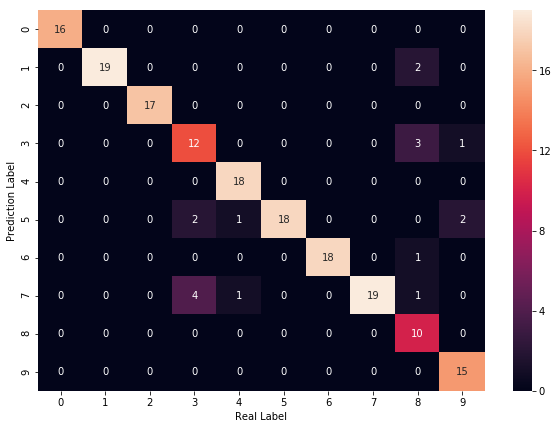

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:58 index:[5] real:5
#1 min_error:59 index:[2] real:2
#2 min_error:72 index:[8] real:8
#3 min_error:15 index:[0] real:0
#4 min_error:59 index:[1] real:1
#5 min_error:48 index:[7] real:7
#6 min_error:36 index:[6] real:6
#7 min_error:55 index:[3] real:3
#8 min_error:41 index:[2] real:2
#9 min_error:55 index:[1] real:1
#10 min_error:71 index:[7] real:7
#11 min_error:79 index:[7] real:4
#12 min_error:40 index:[6] real:6
#13 min_error:62 index:[3] real:3
#14 min_error:50 index:[1] real:1
#15 min_error:68 index:[3] real:3
#16 min_error:81 index:[9] real:9
#17 min_error:56 index:[1] real:1
#18 min_error:73 index:[7] real:7
#19 min_error:27 index:[6] real:6
#20 min_error:68 index:[8] real:8
#21 min_error:48 index:[4] real:4
#22 min_error:53 index:[3] real:3
#23 min_error:62 index:[1] real:1
#24 min_error:48 index:[4] real:4
#25 min_error:23 index:[0] real:0
#26 min_error:51 index:[5] real:5
#27 min_error:42 index:[3] real:3
#28 min_error:66 index:[6] real:6
#29 min_error:57 index:[

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8973407544836116
Avg Base Learner:0.79282622139765


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    #print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

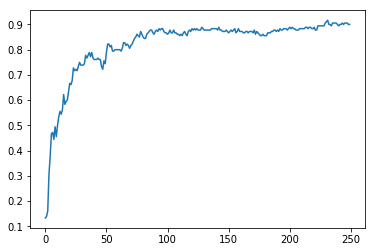

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
# program to check if there is exist a path between two vertices 
# of a graph 

from collections import defaultdict 

#This class represents a directed graph using adjacency list representation 
class Graph: 

	def __init__(self,vertices): 
		self.V= vertices #No. of vertices 
		self.graph = defaultdict(list) # default dictionary to store graph 

	# function to add an edge to graph 
	def addEdge(self,u,v): 
		self.graph[u].append(v) 
	
	# Use BFS to check path between s and d 
	def isReachable(self, s, d): 
		# Mark all the vertices as not visited 
		visited =[False]*(self.V) 

		# Create a queue for BFS 
		queue=[] 

		# Mark the source node as visited and enqueue it 
		queue.append(s) 
		visited[s] = True

		while queue: 

			#Dequeue a vertex from queue 
			n = queue.pop(0) 
			
			# If this adjacent node is the destination node, 
			# then return true 
			if n == d: 
				return True

			# Else, continue to do BFS 
			for i in self.graph[n]: 
				if visited[i] == False: 
					queue.append(i) 
					visited[i] = True
		# If BFS is complete without visited d 
		return False
    
    
def findAllPath(graph,start,end,path=[]):
    path = path +[start]
    if start == end:
        return [path]
 
    paths = [] #存储所有路径    
    for node in graph[start]:
        if node not in path:
            newpaths = findAllPath(graph,node,end,path) 
            for newpath in newpaths:
                paths.append(newpath)
    return paths

numbers = [*range(2)]
number_of_classification = len(numbers)

list_nodes_number = []
list_connection_number = []

for winner in winner_list:
    used_nodes = list(winner.nodes.keys())
    # create a dict for mapping 
    l1 = numbers + config.genome_config.input_keys + used_nodes[number_of_classification:]
    l2 = range(len(l1))
    dict_nodes = dict(zip(l1, l2))

    ### 将节点加入图
    g = Graph(len(l1))# inputs + outputs + used  
    # add connections in the graph
    for cg in winner.connections.values():
        if cg.enabled:
            g.addEdge(dict_nodes[cg.key[0]],dict_nodes[cg.key[1]])

    v = numbers
    list_connections = []
    for vi in v:
        for u in range(number_of_classification, len(config.genome_config.input_keys) + number_of_classification):
            list_connections.append(g.isReachable(u, vi))

    nodes_inputs = range(number_of_classification, number_of_classification+ 64)
    nodes_outputs = range(number_of_classification)
    nodes_mid = range(number_of_classification + 64, len(dict_nodes))

    # 找到所有输入和输出连接的路
    all_path = []
    for u in nodes_inputs:
        for v in nodes_outputs:
            path = findAllPath(g.graph, u, v)
            if path:
                all_path = all_path + path

    # 得到最长路，以及每个节点在哪个层级
    max_length = max([len(x) for x in all_path])
    nodes_tuples_list = []
    for path in all_path:
        #print(path)
        for node in path:
            nodes_tuples_list.append([node, path.index(node)])

    # 确定节点的层级（消除重复）       
    nodes_tuples_fixed_list = []
    for index in range(max_length):
        for nodes in nodes_tuples_list:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                if nodes not in nodes_tuples_fixed_list:
                    nodes_tuples_fixed_list.append(nodes)


    # 所有有连接的节点
    all_used_nodes = []
    for node in nodes_tuples_fixed_list:
        if node[0] not in all_used_nodes:
            all_used_nodes.append(node[0])

    # 确定节点的层级（最终确定）
    nodes_tuples_fixed_list_final = []

    for node in all_used_nodes:
        if node in nodes_inputs:
            nodes_tuples_fixed_list_final.append([node, 0])
        elif node in nodes_outputs:
            nodes_tuples_fixed_list_final.append([node, max_length - 1])
        else:
            list_node = []
            for nodes in nodes_tuples_fixed_list:
                if node == nodes[0]:
                    list_node.append(nodes)
            layer = 0
            for ele in list_node:
                # 删除重复项，取最大
                if ele[1] > layer:
                    layer = ele[1]
            nodes_tuples_fixed_list_final.append([node,layer])


    # 每个层级的节点合数
    length_of_layers = []
    number_of_nodes = 0
    for index in range(max_length):
        for nodes in nodes_tuples_fixed_list_final:
            node, node_index = nodes[0], nodes[1]
            if node_index == index: 
                number_of_nodes += 1
        length_of_layers.append(number_of_nodes)

    length_of_each_layer = []
    length_of_each_layer.append(length_of_layers[0])
    for i in range(1, max_length):
        length_of_each_layer.append(length_of_layers[i] - length_of_layers[i-1])

    # 输出每个层级的节点个数
    #print("length of each layers:", length_of_each_layer)

    # 所有端到端的路
    all_path_side2side = []
    for path in all_path:
        if len(path) == 2:
            all_path_side2side.append(path)
        else:
            for i in range(len(path)-1):
                all_path_side2side.append([path[i],path[i+1]])

    # 定义节点到绘图的字典
    dict_nodes_graph = dict()
    count_number_layer = [0] * max_length
    for nodes in nodes_tuples_fixed_list_final:
        node, layer = nodes
        dict_nodes_graph[node] = [count_number_layer[layer], layer]
        count_number_layer[layer] += 1
    list_nodes_number.append(np.sum(length_of_each_layer))
    list_connection_number.append(len(all_path_side2side))
    #print("Number of nodes:{} Number of connections:{}".format(np.sum(length_of_each_layer),len(all_path_side2side)))
print("Total nodes:{} Total connections::{}".format(np.sum(list_nodes_number), np.sum(list_connection_number)))

Total nodes:4624 Total connections::4908
